In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [82]:
df = pd.read_csv('/content/Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [83]:
x = df.drop('Status', axis=1)
x = df['dtir1']
#x.dropna(inplace=True)
y = df['Status']

In [84]:
print(x)

0         45.0
1          NaN
2         46.0
3         42.0
4         39.0
          ... 
148665    48.0
148666    15.0
148667    49.0
148668    29.0
148669    44.0
Name: dtir1, Length: 148670, dtype: float64


In [85]:
print(y)

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148670, dtype: int64


In [86]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
y_pred = xgb_model.predict(x_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [90]:
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 score:", f1*100)
print("ROC AUC score:"), roc_auc*100

Accuracy: 80.94941817448039
Precision: 66.86177397568662
Recall: 45.46072995680125
F1 score: 54.12245889689803
ROC AUC score:


(None, 69.03133552688895)

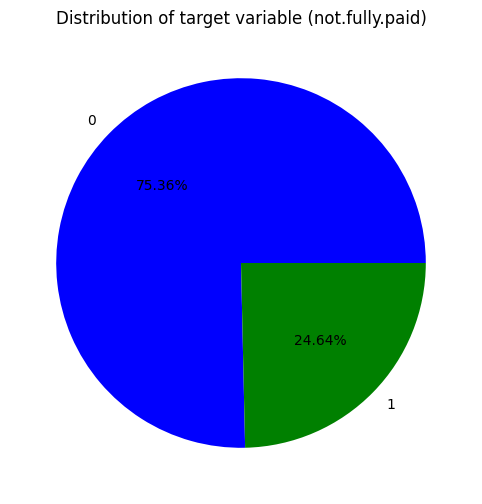

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
y.value_counts().plot(kind='pie', autopct='%2.2f%%', colors=['blue', 'green'])
plt.title('Distribution of target variable (not.fully.paid)')
plt.xlabel('')
plt.ylabel('')
plt.show()

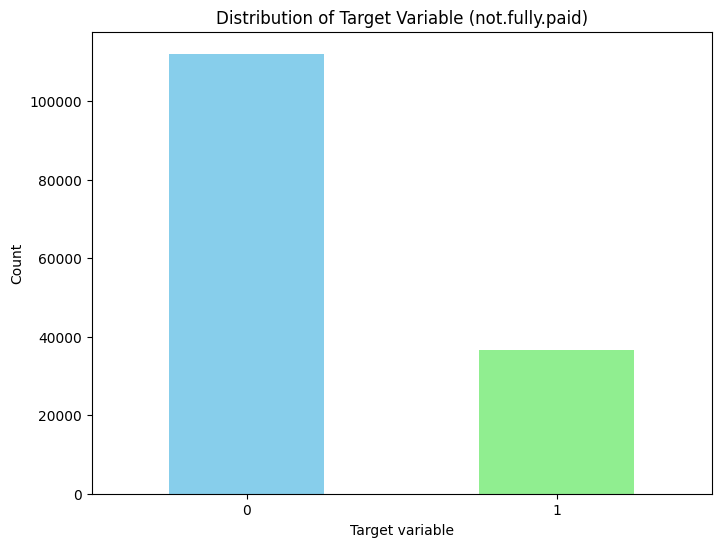

In [92]:
plt.figure(figsize=(8,6))
y.value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Target Variable (not.fully.paid)')
plt.xlabel('Target variable')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()